# DSC 190 Protein Topological Data Analysis EDA

Download some protein structures from protein data bank . Compute suitable persistence diagrams (as topological summaries) for these atomic structures. Compare / cluster them via some clustering method. You can try different distance metrics for persistence diagram summaries.

Alternatively, you can focus on a few molecules and provide detailed topological analysis. I think they have structures for some SARS-CoV-2 Spike and Antibodies available [http://pdb101.rcsb.org/motm/256](http://pdb101.rcsb.org/motm/256). You can study their topological profiles.

In [1]:
%load_ext autoreload
%autoreload 2
%cd '../src'
# %matplotlib widget
%matplotlib inline

/media/apfriend/sabrent/ucsd/classes/dsc190/project/src


In [2]:
import os
import sys
import re
import warnings
import gudhi as gd
import pandas as pd
import numpy as np
import nglview as nv
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionWarning

In [3]:
# add project directory to path
# sys.path.append(os.path.dirname(os.getcwd()))
# from scripts import eda
import eda as eda
import pda as pda


#hide discontinuous chain warnings
warnings.simplefilter('ignore', PDBConstructionWarning)

## Example Insulin Protein data
### Human Recombinant Insulin (Humalin)
Analysing example file of human insulin, file `../data/cleaned/Designer-Insulin/1TRZ.csv`

- pdb entry: https://www.rcsb.org/structure/1RTZ

In [4]:
r_max=5

rinsulin_csv_fp='../data/test/csv-data/Designer-Insulins/1trz.csv'
rinsulin_pdb_fp='../data/test/pdb-data/Designer-Insulins/1trz.pdb'

parser=PDBParser()
rinsulin_structure=parser.get_structure('1trz', rinsulin_pdb_fp)
nv.show_biopython(rinsulin_structure)

NGLWidget()

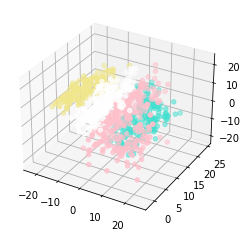

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [7, 4]
Number of chains:  4


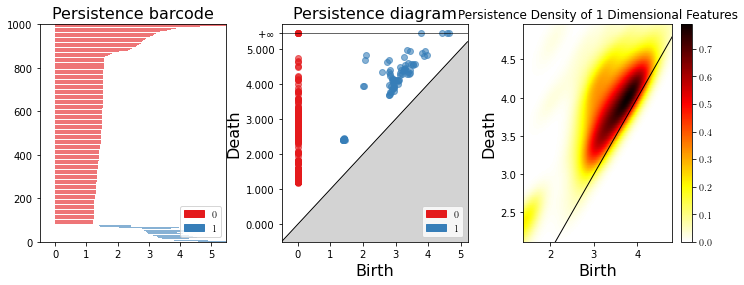

In [5]:
rinsulin_simplex_tree=eda.load_display_protein(
    csv_src=rinsulin_csv_fp,
    pdb_src=rinsulin_pdb_fp,
    r_max=r_max
)

### Human Recombinant Insulin (Lantus)
Analysing example file of human insulin, file `../data/cleaned/Designer-Insulin/4iyf.csv`

- pdb entry: https://www.rcsb.org/structure/4iyf

In [6]:
rinsulin2_csv_fp='../data/test/csv-data/Designer-Insulins/4iyf.csv'
rinsulin2_pdb_fp='../data/test/pdb-data/Designer-Insulins/4iyf.pdb'

parser=PDBParser()
rinsulin2_structure=parser.get_structure('4iyf', rinsulin2_pdb_fp)
nv.show_biopython(rinsulin2_structure)

NGLWidget()

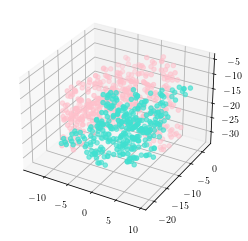

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 0]
Number of chains:  2


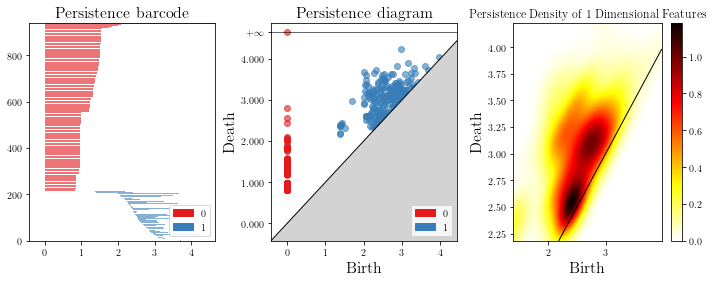

In [7]:
rinsulin2_simplex_tree=eda.load_display_protein(
    csv_src=rinsulin2_csv_fp,
    pdb_src=rinsulin2_pdb_fp,
    r_max=r_max
)

### Human Recombinant Insulin (Tresiba)
Analysing example file of human insulin, file `../data/cleaned/Designer-Insulin/4ajx.csv`

- pdb entry: https://www.rcsb.org/structure/4ajx

In [10]:
rinsulin3_csv_fp='../data/test/csv-data/Designer-Insulins/4ajx.csv'
rinsulin3_pdb_fp='../data/test/pdb-data/Designer-Insulins/4ajx.pdb'

rinsulin3_structure=parser.get_structure('4ajx', rinsulin3_pdb_fp)
nv.show_biopython(rinsulin3_structure)

NGLWidget()

In [12]:
rinsulin3_simplex_tree=eda.load_display_protein(
    csv_src=rinsulin3_csv_fp,
    pdb_src=rinsulin3_pdb_fp,
    r_max=r_max
)

ParserError: Error tokenizing data. C error: Expected 3 fields in line 6, saw 6


### Insulin Receptor
Analysing example file of human insulin, file `../data/cleaned/Designer-Insulin/1IR3.csv`

- pdb entry: https://www.rcsb.org/structure/1IR3

In [13]:
insulin_receptor_csv_fp='../data/test/csv-data/Insulin-Receptor/1IR3.csv'
insulin_receptor_pdb_fp='../data/test/pdb-data/Insulin-Receptor/1IR3.pdb'

insulin_receptor_structure=parser.get_structure('1IR3', insulin_receptor_pdb_fp)
nv.show_biopython(insulin_receptor_structure)

NGLWidget()

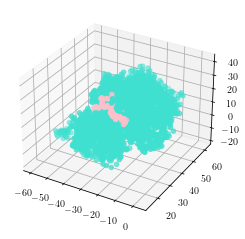

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 327]
Number of chains:  2


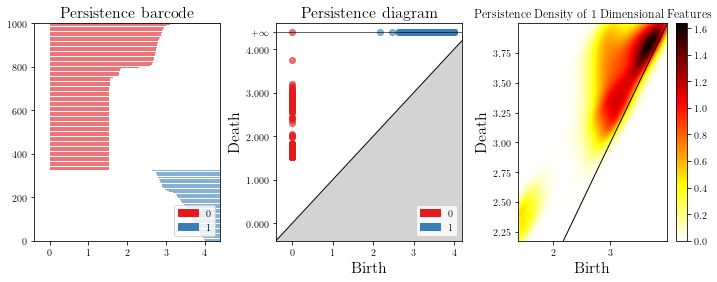

In [29]:
insulin_receptor_tree=eda.load_display_protein(
    csv_src=insulin_receptor_csv_fp,
    pdb_src=insulin_receptor_pdb_fp,
    r_max=4
)

### Bovine Insulin
Analysing example file of human insulin, file `../data/cleaned/Designer-Insulin/1pid.csv`

- pdb entry: https://www.rcsb.org/structure/1pid

In [30]:
bovine_insulin_csv_fp='../data/test/csv-data/Bovine-Insulin/1pid.csv'
bovine_insulin_pdb_fp='../data/test/pdb-data/Bovine-Insulin/1pid.pdb'

bovine_insulin_structure=parser.get_structure('1pid', bovine_insulin_pdb_fp)
nv.show_biopython(bovine_insulin_structure)

FileNotFoundError: [Errno 2] No such file or directory: '../data/test/pdb-data/Bovine-Insulin/1pid.pdb'

In [ ]:
bovine_simplex_tree=eda.load_display_protein(
    csv_src=bovine_insulin_csv_fp,
    pdb_src=bovine_insulin_pdb_fp,
    r_max=r_max
)

### Insulin Receptor
Analysing example file of insulin receptor, file `../data/test/csv-data/Insulin-Receptor/1IRK.csv`

- pdb entry: https://www.rcsb.org/structure/1IRK

In [27]:
insulin_receptor2_csv_fp='../data/test/csv-data/Insulin-Receptor/1IRK.csv'
insulin_receptor2_pdb_fp='../data/test/pdb-data/Insulin-Receptor/1IRK.pdb'

insulin_receptor2_structure=parser.get_structure('1IRK', insulin_receptor2_pdb_fp)
nv.show_biopython(insulin_receptor2_structure)

NGLWidget()

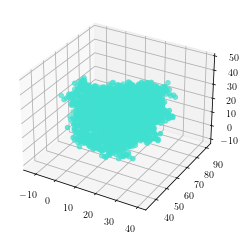

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 3]
Number of chains:  1


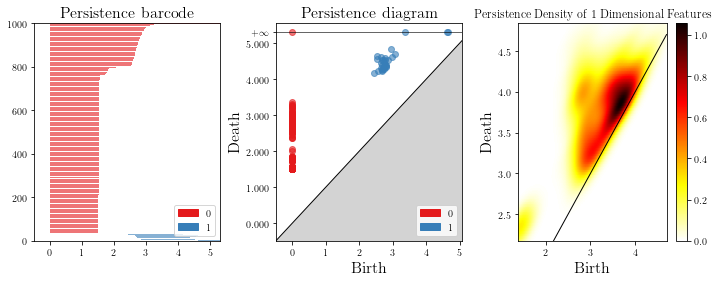

In [28]:
insulin_receptor2_simplex_tree=eda.load_display_protein(
    csv_src=insulin_receptor2_csv_fp,
    pdb_src=insulin_receptor2_pdb_fp,
    r_max=r_max
)

### Glucagon
Analysing example file of glucagon, file `../data/cleaned/Glucagon/3IOL.csv`

- pdb entry: https://www.rcsb.org/structure/3IOL

In [24]:
glucagon_csv_fp='../data/test/csv-data/Glucagon/3IOL.csv'
glucagon_pdb_fp='../data/test/pdb-data/Glucagon/3IOL.pdb'

glucagon_structure=parser.get_structure('3IOL', glucagon_pdb_fp)
nv.show_biopython(glucagon_structure)

NGLWidget()

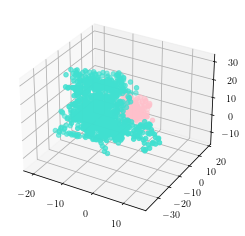

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 1]
Number of chains:  2


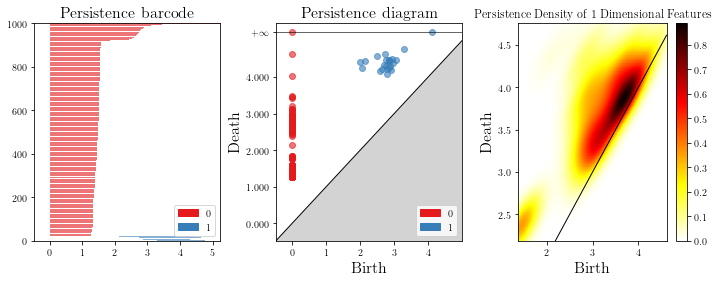

In [25]:
insulin_receptor2_simplex_tree=eda.load_display_protein(
    csv_src=glucagon_csv_fp,
    pdb_src=glucagon_pdb_fp,
    r_max=r_max
)

### Seneca Valley Virus
Analysing example file of human insulin, file `../data/cleaned/Seneca-Valley-Virus/3cji.csv`

- pdb entry: https://www.rcsb.org/structure/3cji

In [26]:
sv_virus_csv_fp='../data/test/csv-data/Seneca-Valley-Virus/3cji.csv'
sv_virus_pdb_fp='../data/test/pdb-data/Seneca-Valley-Virus/3cji.pdb'

sv_virus_structure=parser.get_structure('3cji', sv_virus_pdb_fp)
nv.show_biopython(sv_virus_structure)

FileNotFoundError: [Errno 2] No such file or directory: '../data/test/pdb-data/Seneca-Valley-Virus/3cji.pdb'

In [ ]:
sv_virus_simplex_tree=eda.load_display_protein(
    csv_src=sv_virus_csv_fp,
    pdb_src=sv_virus_csv_fp,
    r_max=r_max
)

### SARS-COV Spike Protein
Analysing example file of human insulin, file `../data/test/csv-data/Sars-Cov-Spike/6crz.csv`

- pdb entry: https://www.rcsb.org/structure/3cji

In [35]:
sars_csv_fp='../data/test/csv-data/Sars-Cov-Spike/6crz.csv'
sars_pdb_fp='../data/test/pdb-data/Sars-Cov-Spike/6crz.pdb'

sars_structure=parser.get_structure('6crz', sars_pdb_fp)
nv.show_biopython(sars_structure)

NGLWidget()

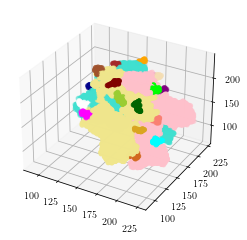

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 421]
Number of chains:  22


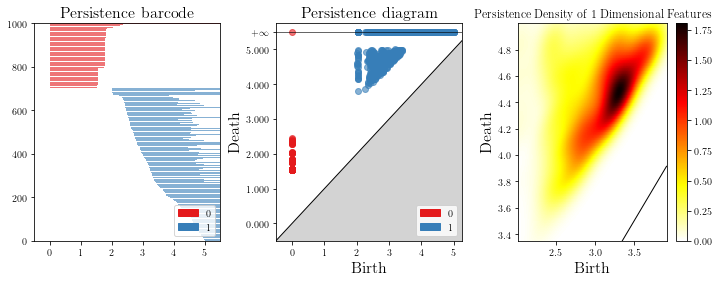

In [37]:
sars_simplex_tree=eda.load_display_protein(
    csv_src=sars_csv_fp,
    pdb_src=sars_pdb_fp,
    r_max=r_max
)

### SARS-COV-2 
Analysing example file of human insulin, file `../data/cleaned/Sars-Cov-2-Spike/6VXX.csv`

- pdb entry: https://www.rcsb.org/structure/6VXX

In [38]:
covid_csv_fp='../data/test/csv-data/Sars-Cov-2-Spike/6VXX.csv'
covid_pdb_fp='../data/test/pdb-data/Sars-Cov-2-Spike/6VXX.pdb'

covid_structure=parser.get_structure('6VXX', covid_pdb_fp)
nv.show_biopython(covid_structure)

NGLWidget()

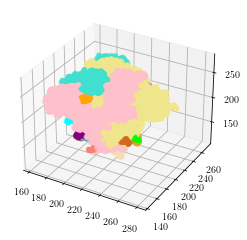

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 205]
Number of chains:  18


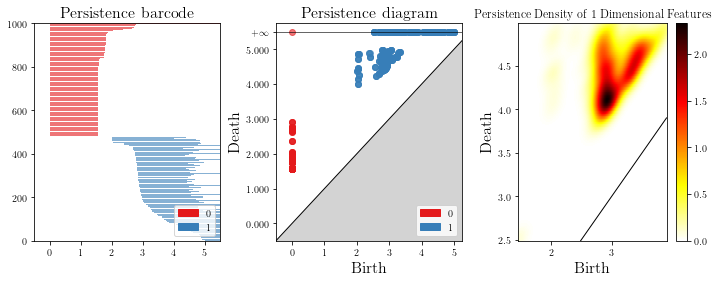

In [39]:
covid_simplex_tree=eda.load_display_protein(
    csv_src=covid_csv_fp,
    pdb_src=covid_pdb_fp,
    r_max=r_max
)

### Drug Resistant Common Cold 
Analysing example file of human insulin, file `../data/cleaned/Common-Cold/2rmu.csv`

- pdb entry: https://www.rcsb.org/structure/2rmu

In [40]:
cold_csv_fp='../data/test/csv-data/Common-Cold/2rmu.csv'
cold_pdb_fp='../data/test/pdb-data/Common-Cold/2rmu.pdb'

cold_structure=parser.get_structure('2rmu', cold_pdb_fp)
nv.show_biopython(cold_structure)

NGLWidget()

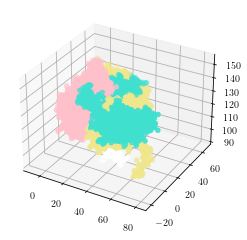

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 19]
Number of chains:  4


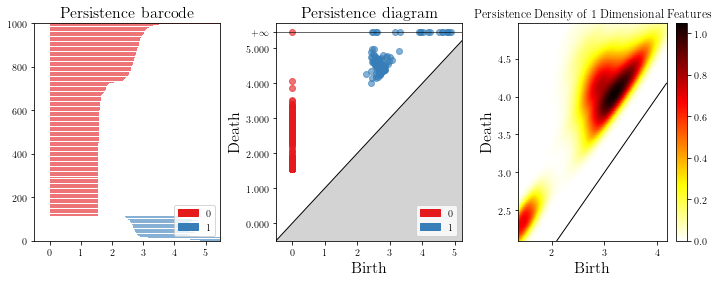

In [41]:
cold_simplex_tree=eda.load_display_protein(
    csv_src=cold_csv_fp,
    pdb_src=cold_pdb_fp,
    r_max=r_max
)

### Ebola
Analysing example file of human insulin, file `../data/cleaned/Ebola/1H2C.csv`

- pdb entry: https://www.rcsb.org/structure/1H2C

In [42]:
ebola_csv_fp='../data/test/csv-data/Ebola/1H2C.csv'
ebola_pdb_fp='../data/test/pdb-data/Ebola/1H2C.pdb'

ebola_structure=parser.get_structure('1H2C', ebola_pdb_fp)
nv.show_biopython(ebola_structure)

NGLWidget()

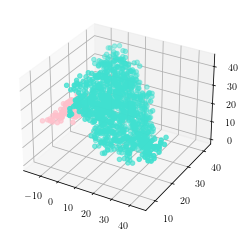

/home/apfriend/anaconda3/envs/proteins/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)


betti_numbers:  [1, 1]
Number of chains:  2


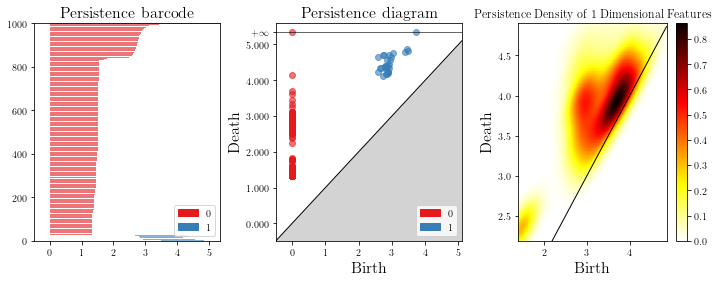

In [43]:
ebola_simplex_tree=eda.load_display_protein(
    csv_src=ebola_csv_fp,
    pdb_src=ebola_pdb_fp,
    r_max=r_max
)

### Compute Rips Complex for Molecular Point cloud (With no Max distance between Atoms)

In [ ]:
r_max=6
insulin_rips_complex=pda.rips_complex(insulin_point_data, r_max=r_max)
insulin_simplex_tree=insulin_rips_complex.create_simplex_tree(max_dimension=2)

eda.plot_rips_persistence_diagram(simplex_tree=insulin_simplex_tree)
print(insulin_simplex_tree.betti_numbers())

Since not all atoms are bonded to each other however, it makes sense to limit the edge weight.

### Compute Rips Complex for Molecular Point cloud (`max_edge_length=10`)

In [ ]:
insulin_rips_complex=pda.rips_complex(
    data=insulin_point_data,
    r_max=10
    
)
insulin_simplex_tree=insulin_rips_complex.create_simplex_tree(max_dimension=2)

eda.plot_rips_persistence_diagram(simplex_tree=insulin_simplex_tree)

In [ ]:
insulin_simplex_tree.betti_numbers()

In [ ]:
insulin_rips_complex=pda.rips_complex(
    data=insulin_point_data,
    r_max=3
    
)
insulin_simplex_tree=insulin_rips_complex.create_simplex_tree(max_dimension=2)

eda.plot_rips_persistence_diagram(simplex_tree=insulin_simplex_tree)
print(insulin_simplex_tree.betti_numbers())

In [ ]:
insulin_simplex_tree.num_simplices()

In [ ]:
help(insulin_simplex_tree.write_persistence_diagram)

In [ ]:
[p for p in insulin_simplex_tree.persistence() if p[0]==1]

## Compare to Coronavirus Protease

In [ ]:
covid_csv_fp='../data/csv-data/Coronavirus-Protease/4yoi.csv'
covid_pdb_fp='../data/pdb-data/Coronavirus-Protease/4yoi.pdb'
# fp=os.path.join(datapath, fn)
covid_simplex_tree=eda.load_display_protein(
    csv_src=covid_csv_fp,
    pdb_src=covid_pdb_fp,
    r_max=6
)

In [ ]:
parser=PDBParser()
structure=parser.get_structure('4yoi', covid_pdb_fp)
nv.show_biopython(structure)

In [ ]:
list(structure.get_chains())

## Glucagon

In [ ]:
glucagon_scv_fp='../data/csv-data/Glucagon/1GCN.csv'
glucagon_pdb_fp='../data/pdb-data/Glucagon/1GCN.pdb'

glucagon_simplex_tree=eda.load_display_protein(
    csv_src=glucagon_scv_fp,
    pdb_src=glucagon_pdb_fp,
    r_max=6
)

In [ ]:
glucagon_structure=parser.get_structure('1GCN', glucagon_pdb_fp)
nv.show_biopython(glucagon_structure)

## Prions

In [ ]:
prion_csv_fp='../data/csv-data/Prions/1QM2.csv'
prion_pdb_fp='../data/pdb-data/Prions/1QM2.pdb'

prion_simplex_tree=eda.load_display_protein(
    csv_src=prion_csv_fp,
    pdb_src=prion_pdb_fp,
    r_max=5
)

In [ ]:
parser=PDBParser()
prion_structure=parser.get_structure('1QM2', prion_pdb_fp)
nv.show_biopython(prion_structure)

## Large files seem to be causing trouble

Copy files under 150MB to new folder

In [ ]:
from glob import glob
import shutil
from tqdm.auto import tqdm

csv_files=glob('../data/csv-data/*/*.csv')
pdb_files=glob('../data/pdb-data/*/*.csv')

csv_dst='../data/test/csv-data'
pdb_dst='../data/test/pdb-data'

max_file_size=150*(2**10)

for file in tqdm(csv_files):
    try:
        if pda.get_size_of(file)<max_file_size:
            csv_fn=os.path.basename(file)
            folder=os.path.basename(os.path.dirname(file))
            pdb_fn=os.path.basename(file).replace('.csv','.pdb')
            pdb_fp=os.path.join('../data/pdb-data',folder,pdb_fn)



            os.makedirs(os.path.join(csv_dst, folder), exist_ok=True)
            shutil.copyfile(file, os.path.join(csv_dst, folder, csv_fn))
            os.makedirs(os.path.join(pdb_dst, folder), exist_ok=True)
            shutil.copyfile(pdb_fp, os.path.join(pdb_dst, folder, pdb_fn))
    except FileNotFoundError as e:
        print("%s not found"%pdb_fn)

In [ ]:
path='../data/test/pdb-data/Glucagon/1GCN.pdb'

parser=PDBParser()
structure=parser.get_structure('1GCN', path)
help(structure)